In [3]:
from turtle import distance
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import config.config as config

In [28]:
cd = pd.read_csv("../data/curve__lidar__data.csv")
pc = pd.read_csv('../data/curve__pc.csv')

In [75]:
pc_array = np.stack([pc['pc_x'], pc['pc_y'], pc['reflect']], axis=1)
positions = np.stack([cd['positions_x_ground_truth'], cd['positions_y_ground_truth']], axis=1)


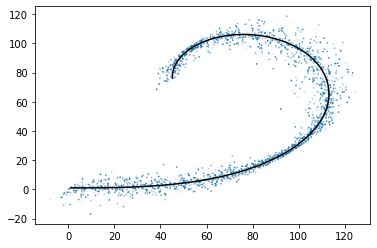

In [80]:
plt.plot(positions[:,0], positions[:,1], c="Black")
plt.scatter(pc_array[:,0], pc_array[:,1], alpha = pc_array[:,2], s= 0.5)

In [84]:
alphas = np.array([0, 0.005, 0.01, 0.02, 0.03, 0.06])
MORs = [np.inf, 600, 300, 150, 100, 50]
index = 3


alpha = alphas[index]
beta = 0.046/MORs[index]
beta_0 = 1*10**(-6)/np.pi
p_min = 0.9/(np.pi * config.lidar_range**2)

In [85]:
p_min

0.002864788975654116

In [103]:
def apply_rain(position, rain_rate):

    # get all points in range of lidar sensor
    subs = (position - pc_array[:,0:2])
    # calculate their range
    ranges = np.linalg.norm(subs, axis=1)
    in_range = ranges[ranges<config.lidar_range]

    points = subs[ranges< config.lidar]
    # get their reflectivity
    reflectivities = points[:,2][ranges < config.lidar_range] #+ np.random.randn(p.shape)*self.points_measure_noise
    new_intensities = reflectivities/(in_range**2) * np.exp(-0.02*(rain_rate**0.6)*in_range)

    # filter out the points with intensities below p_min
    taken_ranges = in_range[new_intensities > p_min]
    taken_intensities = new_intensities[new_intensities > p_min]
    taken_points = points[new_intensities > p_min]

    # noise the ranges
    noisy_ranges = np.random.normal(0, 0.02*taken_ranges*(1-np.exp(-rain_rate))**2)

    return noisy_ranges, taken_intensities, taken_points

In [104]:
ranges, intensities, points = apply_rain(positions[100], 20)

UnboundLocalError: local variable 'pc_array' referenced before assignment

In [102]:
ranges

array([-1.19226540e-01, -2.40693489e-02, -2.80367540e-01, -2.69590787e-01,
       -1.04072574e-01,  1.28756491e-01,  4.17841786e-02, -8.91996031e-02,
       -1.55835937e-01,  4.18540292e-02, -3.85707064e-02, -1.29999702e-01,
       -5.58210257e-02,  4.35669640e-02, -3.26145842e-02, -7.84252756e-02,
        2.42389979e-02,  1.03170635e-01,  8.04386084e-02, -1.19719501e-01,
        1.36729861e-01, -1.12390004e-01, -5.03169833e-02, -8.80570648e-02,
       -7.06465967e-04,  9.92159261e-02,  5.95893519e-02, -1.42795472e-02,
        1.20124409e-01, -2.58691704e-01,  5.40984152e-02, -9.83685731e-02,
       -1.07816624e-01, -8.73624039e-02,  7.25174045e-04, -7.41026420e-03,
        5.05980367e-03,  5.48036546e-02, -3.30664793e-02, -4.09904583e-02,
        1.28790311e-02, -1.68162837e-04, -1.67520975e-02,  4.90318626e-02,
       -3.77970683e-02,  5.16780120e-02,  2.69217229e-02,  1.17452646e-01,
        5.42131426e-02, -2.24794273e-01, -1.13981541e-01,  1.21906312e-02,
       -2.58147275e-02,  

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

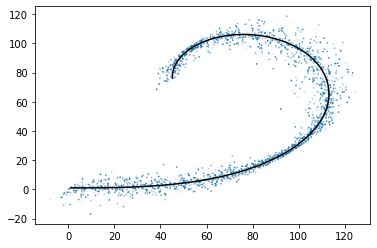

In [98]:
plt.plot(positions[:,0], positions[:,1], c="Black")
plt.scatter(pc_array[:,0], pc_array[:,1], alpha = pc_array[:,2], s= 0.5)
plt.scatter(ranges[:,0], ranges[:,1], s = intensities)

In [23]:

# create measurements

def apply_fog():
    for p in positions:
        subs = (p - pc_array[:,0:2])
        intensitys = pc_array[:,3] #+ np.random.randn(p.shape)*self.pc_array_measure_noise
        range = np.linalg.norm(subs, axis=1)
        print(intensitys)


apply_fog



In [12]:
a = np.array([0,1])
np.append(a,3)

array([0, 1, 3])

In [15]:
np.random.random()

0.6358655974501076